In [1]:
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split



In [ ]:
#load data
df = pd.read_csv("hospital_readmissions.csv")

In [38]:
print(df.head())
print(df.shape)


       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 max_glu_serum A1Ctest change diabetes_me

In [39]:
for column, values in df.iteritems():
    unique_values = values.sort_values().unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'age': ['[40-50)' '[50-60)' '[60-70)' '[70-80)' '[80-90)' '[90-100)']

Unique values in column 'time_in_hospital': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]

Unique values in column 'n_lab_procedures': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 105 106 108 109 111
 113]

Unique values in column 'n_procedures': [0 1 2 3 4 5 6]

Unique values in column 'n_medications': [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 68 69 72 75 79]

Unique values 

In [40]:
df.replace('Missing', np.nan, inplace=True)
df[df.notnull().all(1)]
print(df.head())

       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0               NaN  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0               NaN  Circulatory   
3             1            0            0               NaN  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 max_glu_serum A1Ctest change diabetes_me

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  12618 non-null  object
 9   diag_1             24996 non-null  object
 10  diag_2             24958 non-null  object
 11  diag_3             24804 non-null  object
 12  max_glu_serum      25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [44]:
for column in columns_to_map:
    print(f'Unique values in {column}: {df[column].unique()}')


Unique values in readmitted: [0 1]
Unique values in change: [0 1]
Unique values in diabetes_med: [1 0]


In [43]:
#set to numeric
mapping = {'yes': 1, 'no': 0}

# columns to map
columns_to_map = ['readmitted', 'change', 'diabetes_med']

for x in columns_to_map:
    df[x] = df[x].map(mapping)
    
    
#set to numeric
mapping2 = {'high': 2, 'normal': 1, 'no': 0}
to_map = ['max_glu_serum', 'A1Ctest']

for column in to_map:
    df[column] = df[column].map(mapping2)

#age
ordinal_mapping = {
    '[40-50)': 1,
    '[50-60)': 2,
    '[60-70)': 3,
    '[70-80)': 4,
    '[80-90)': 5,
    '[90-100)': 6
}

df['age'] = df['age'].map(ordinal_mapping)                  


In [46]:
print(df.head())

   age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0    4                 8                72             1             18   
1    4                 3                34             2             13   
2    2                 5                45             0             18   
3    4                 2                36             0             12   
4    3                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0               NaN  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0               NaN  Circulatory   
3             1            0            0               NaN  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3  max_glu_serum  A1Ctest  change  diabetes_med  \
0  Respiratory 

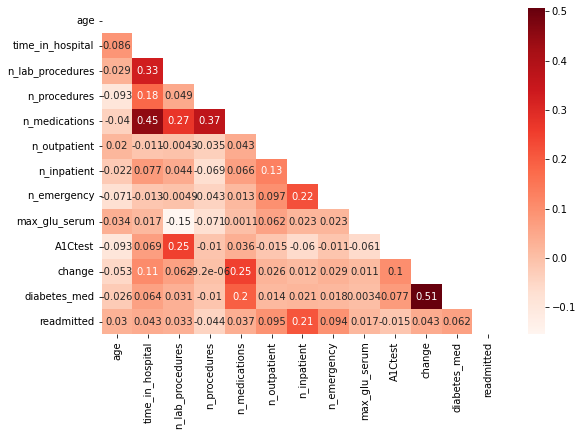

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,max_glu_serum,A1Ctest,change,diabetes_med,readmitted
count,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,3.344120,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600,0.082440,0.275560,0.460120,0.769120,0.470160
std,1.315633,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873,0.361288,0.652536,0.498417,0.421404,0.499119
min,1.000000,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,6.000000,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [45]:
#correlation
corr = df.corr()

fig = plt.figure(figsize=(9, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap='Reds', mask=mask)

plt.show()

df.describe()

(array([2532.,    0., 4452.,    0., 5913.,    0., 6837.,    0., 4516.,
         750.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

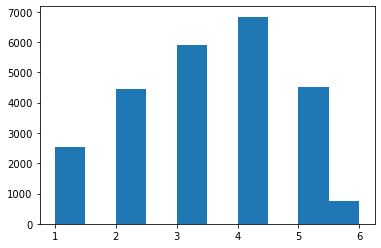

In [47]:
plt.hist(df['age']) 

Logistic Regression Model

In [76]:
dropped = ['time_in_hospital', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'change', 'readmitted']
X = df.drop(dropped, axis=1)
y = df[['readmitted']]

# Split into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# fit the logistic regression 
model = sm.Logit(y_train, X_train)
log_reg = model.fit()

print(log_reg.summary())




Optimization terminated successfully.
         Current function value: 0.659109
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                18750
Model:                          Logit   Df Residuals:                    18739
Method:                           MLE   Df Model:                           10
Date:                Wed, 08 Nov 2023   Pseudo R-squ.:                 0.04671
Time:                        22:04:10   Log-Likelihood:                -12358.
converged:                       True   LL-Null:                       -12964.
Covariance Type:            nonrobust   LLR p-value:                5.621e-254
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9337      0.064    -14.540      0.000      -1.060      -0.808
age        

In [77]:
#predictions
yhat = log_reg.predict(X_test) 
prediction = list(map(round, yhat)) 
  
# comparing original and predicted values of y 
print('Actual values', list(y_test.values)) 
print('Predictions :', prediction)

Actual values [array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([0], dtype=int64), array([1],

In [78]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
  
# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[2618  700]
 [1770 1162]]
Test accuracy =  0.6048


In [79]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.3952


Decision Tree

In [82]:
#fit the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

#predictions
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.54


In [86]:
#model evaluation
dt_mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {dt_mse}")


Mean Squared Error: 0.4554
